In [1]:
import pandas as pd

In [2]:

df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df.columns


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


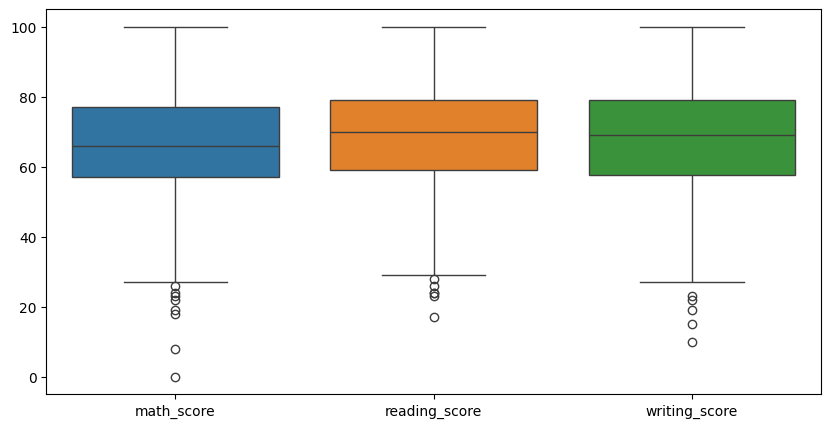

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df[["math_score","reading_score","writing_score"]])
plt.show()


In [10]:
Q1 = df[["math_score","reading_score","writing_score"]].quantile(0.25)
Q3 = df[["math_score","reading_score","writing_score"]].quantile(0.75)
IQR = Q3 - Q1

print(IQR)


math_score       20.00
reading_score    20.00
writing_score    21.25
dtype: float64


In [12]:
outlier_math = (df["math_score"] < (Q1["math_score"] - 1.5*IQR["math_score"])) | \
               (df["math_score"] > (Q3["math_score"] + 1.5*IQR["math_score"]))

outlier_reading = (df["reading_score"] < (Q1["reading_score"] - 1.5*IQR["reading_score"])) | \
                  (df["reading_score"] > (Q3["reading_score"] + 1.5*IQR["reading_score"]))

outlier_writing = (df["writing_score"] < (Q1["writing_score"] - 1.5*IQR["writing_score"])) | \
                  (df["writing_score"] > (Q3["writing_score"] + 1.5*IQR["writing_score"]))

outliers = df[outlier_math | outlier_reading | outlier_writing]
outliers


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


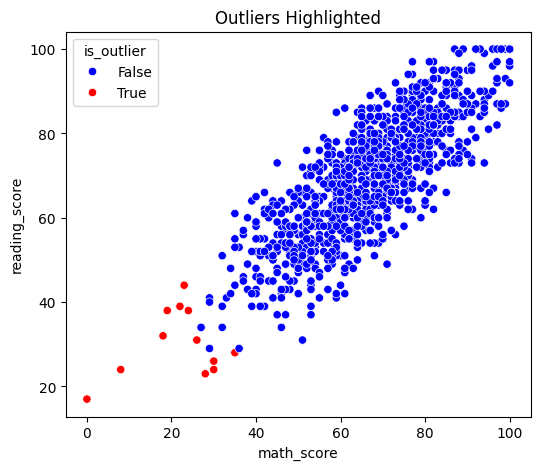

In [16]:
df["is_outlier"] = outlier_math | outlier_reading | outlier_writing

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="math_score",
    y="reading_score",
    hue="is_outlier",
    palette=["blue", "red"]
)
plt.title("Outliers Highlighted")
plt.show()


In [20]:
df["average_score"] = df[["math_score","reading_score","writing_score"]].mean(axis=1)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,is_outlier,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,False,72.666667
1,female,group C,some college,standard,completed,69,90,88,False,82.333333
2,female,group B,master's degree,standard,none,90,95,93,False,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,49.333333
4,male,group C,some college,standard,none,76,78,75,False,76.333333


In [22]:
df["pass_math"] = df["math_score"] >= 35
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,is_outlier,average_score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,False,72.666667,True
1,female,group C,some college,standard,completed,69,90,88,False,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,False,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,49.333333,True
4,male,group C,some college,standard,none,76,78,75,False,76.333333,True


In [24]:
df["performance_level"] = pd.cut(df["average_score"], 
                                 bins=[0, 50, 75, 100], 
                                 labels=["Low","Medium","High"])
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,is_outlier,average_score,pass_math,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,False,72.666667,True,Medium
1,female,group C,some college,standard,completed,69,90,88,False,82.333333,True,High
2,female,group B,master's degree,standard,none,90,95,93,False,92.666667,True,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,49.333333,True,Low
4,male,group C,some college,standard,none,76,78,75,False,76.333333,True,High


In [27]:
df[(df["math_score"] < 0) | (df["math_score"] > 100)]
#no such data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,is_outlier,average_score,pass_math,performance_level
